# Recurrent Neural Network

part 1: Data preprocessing
    
importting the libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter('ignore')

### importing the traning set

In [8]:
dataset_train = pd.read_csv(r"C:\Users\satis_asxzdl9\Downloads\Google_Stock_Price_Train (1).csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


In [9]:
training_set = dataset_train.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

# Featuring Scaling 


In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [15]:
training_set.shape

(1258, 1)

#### Creating a data stracture with 60 timessteps and 1 output


In [19]:

X_train = []
y_train =[]

for i in range(60,1258):
        X_train.append(training_set_scaled[i-60:i,0])
        y_train.append(training_set_scaled[i,0])
        
        
X_train,y_train =np.array(X_train),np.array(y_train)        
        

# Reshaping

In [22]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

### Part 2- Building and Training the RNN

importing the keras libraries and packages

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#### initialising the RNN

In [24]:
regressor = Sequential()

####  the first LSTM layers and some Dropout regularAddingisation

In [26]:
regressor.add(LSTM(units=50,return_sequences = True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#### the second LSTM layers and some Dropout regularAddingisation

In [27]:
regressor.add(LSTM(units = 50 ,return_sequences = True))
regressor.add(Dropout(0.2))

##### the third LSTM layers and some Dropout regularAddingisation

In [29]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

##### the fourth LSTM layers and some Dropout regularAddingisation

In [30]:
regressor.add(LSTM(units =50,return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the output Layer

In [34]:
regressor.add(Dense(units = 1))

### Compilling the RNN to the Training set

In [35]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

### Filling the RNN to the Training set

In [36]:
regressor.fit(X_train,y_train,epochs =100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 28s 262ms/step - loss: 0.1210
Epoch 2/100
38/38 [==============================] - 9s 242ms/step - loss: 0.0418
Epoch 3/100
38/38 [==============================] - 8s 217ms/step - loss: 0.0081
Epoch 4/100
38/38 [==============================] - 8s 213ms/step - loss: 0.0058
Epoch 5/100
38/38 [==============================] - 8s 215ms/step - loss: 0.0065
Epoch 6/100
38/38 [==============================] - 8s 217ms/step - loss: 0.0057
Epoch 7/100
38/38 [==============================] - 8s 215ms/step - loss: 0.0051
Epoch 8/100
38/38 [==============================] - 8s 214ms/step - loss: 0.0052
Epoch 9/100
38/38 [==============================] - 8s 213ms/step - loss: 0.0058
Epoch 10/100
38/38 [==============================] - 8s 212ms/step - loss: 0.0053
Epoch 11/100
38/38 [==============================] - 8s 204ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 8s 208ms/step - loss: 0.0042
Epoch 13/100

38/38 [==============================] - 8s 213ms/step - loss: 0.0014
Epoch 100/100
38/38 [==============================] - 8s 216ms/step - loss: 0.0012


In [37]:
pred = regressor.predict(X_train)

38/38 [==============================] - 5s 44ms/step


# Evaluting the RNN

In [38]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_train,pred))
rmse

0.025188272129655194

##### part3- Making the predictions and visualising the results

Getting the real stock price of 2017

In [39]:
dataset_test = pd.read_csv(r"C:\Users\satis_asxzdl9\Downloads\Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [44]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']),axis=0)

inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 63ms/step


# Visualising the results

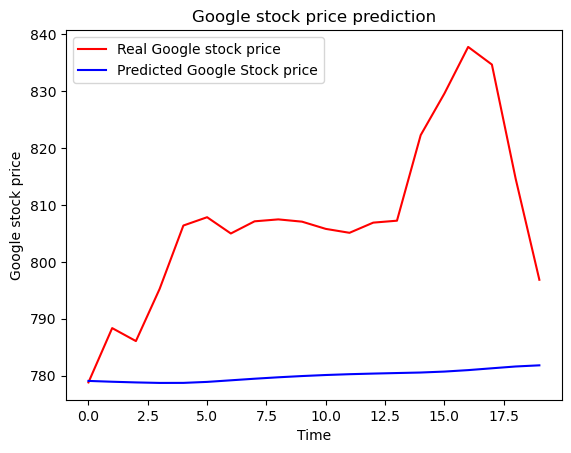

In [45]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google stock price')
plt.plot(predicted_stock_price, color='blue', label = 'Predicted Google Stock price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.legend()
plt.show()